# Facial Expressions Recognition

We are going to write a python script to train a custom supervised machine learning model using Tensorflow and Keras that will be able to recognize the emotions of a face.

data info:
* emotion -> type of picture like angry or sad etc..
* pixels -> resmin pixelleri
* usage -> ne için kullanacak, test yada trainig


epoch ->number of steps our program will nun in each proccess

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data_csv_file_name = 'fer2013/fer2013.csv'

In [3]:
raw_data = pd.read_csv(raw_data_csv_file_name)

In [4]:
raw_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
emotion    35887 non-null int64
pixels     35887 non-null object
Usage      35887 non-null object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


In [6]:
lines = raw_data['emotion'].count()

In [7]:
piksel_uzunlugu = len(raw_data['pixels'][0].split(' '))

In [8]:

print(lines,piksel_uzunlugu)


35887 2304


In [9]:
# training sütünü kaç tane eğitim için kaç tanesi ise test için kullanacak

raw_data['Usage'].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [10]:
# ilk resmin pikseli
#raw_data['pixels'][1]

In [11]:
img = raw_data['pixels'][3]
val_sep = img.split(' ')
x_pixels = np.array(val_sep, 'float32')

In [12]:
# bir resim 0-255 arasında olduğu için her değerimizi 255 bölüp 
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)

http://csfieldguide.org.nz/en/interactives/pixel-viewer/index.html

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

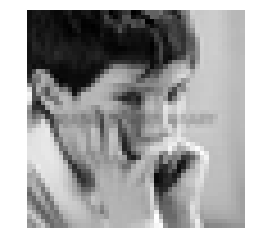

In [33]:
plt.imshow(x_reshaped,cmap='gray',interpolation='nearest')
plt.axis("off")
plt.show()

In [72]:
![image](toface.png)

'[image]' is not recognized as an internal or external command,
operable program or batch file.


In [74]:
from IPython.display import Image

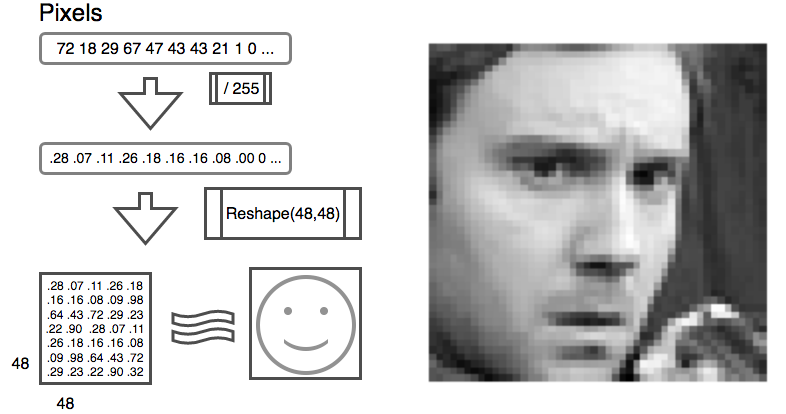

In [76]:
Image(filename='toface.png',width=600,height=600)

#  training and testing the model

In [13]:
import tensorflow as tf

In [14]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

Using TensorFlow backend.


In [15]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [16]:
config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': 56} ) #max: 1 gpu, 56 cpu
sess = tf.Session(config=config) 
keras.backend.set_session(sess)

In [17]:
raw_data.head(2)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training


In [18]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 25

In [19]:
#initialize trainset and test set
X_train, y_train, X_test, y_test = [], [], [], []

In [ ]:

for i in range(1,lines):
    try:
        emotion, img, usage = lines[i].split(",")
          
        val = img.split(" ")
            
        pixels = np.array(val, 'float32')
        
        emotion = keras.utils.to_categorical(emotion, num_classes)
    
        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

In [20]:
for i in range(1,lines):
    try:
        img = raw_data['pixels'][i]
        val_sep = img.split(' ')
        x_pixels = np.array(val_sep, 'float32')
        emotion = keras.utils.to_categorical(raw_data['emotion'], num_classes)
        if 'Training' in raw_data('Usage'):
            y_train.append(raw_data['emotion'])
            X_train.append(x_pixels)
        elif 'PublicTest' in raw_data('Usage'):
            y_test.append(raw_data['emotion'])
            X_test.append(x_pixels)
    except:
      print("", end="")

In [ ]:
lines